In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-06-10 21:16:06--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2022-06-10 21:16:06 (126 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# Encoder 
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

#dataset.drop(['sex', 'children', 'region'], axis=1, inplace=True)

dataset['sex'] = encoder.fit_transform(dataset['sex'])
dataset['smoker'] = encoder.fit_transform(dataset['smoker'])
dataset['region'] = encoder.fit_transform(dataset['region'])

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [5]:
# Split dataset 

dataset = dataset.sample(frac=1)

train_dataset = dataset.sample(frac=0.8)
train_label = train_dataset['expenses']
train_dataset.drop('expenses', axis=1, inplace=True)


test_dataset = dataset.drop(train_dataset.index)
test_label = test_dataset['expenses']
test_dataset.drop('expenses', axis=1, inplace=True)

In [6]:
train_dataset

,age,sex,bmi,children,smoker,region
1200,37,1,24.3,2,0,1
469,18,0,24.1,1,0,2
637,35,0,38.1,2,0,0
183,44,0,26.4,0,0,1
1254,34,0,27.7,0,0,2
...,...,...,...,...,...,...
1136,44,0,25.0,1,0,3
254,50,1,31.8,0,1,0
639,56,1,33.7,4,0,2
803,18,0,42.2,0,1,2


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(train_dataset.keys()),)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(0.05),
    loss='mse',
    metrics=['mae', 'mse']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 6)                24        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,697
Trainable params: 4,685
Non-trainable params: 12
_________________________________________________________________


In [8]:
r = model.fit(train_dataset, train_label, epochs=1000,
              verbose=0)


In [9]:
results = model.evaluate(test_dataset, test_label, verbose=2)
print(results)

9/9 - 0s - loss: 24911860.0000 - mae: 2730.1934 - mse: 24911860.0000 - 187ms/epoch - 21ms/step
[24911860.0, 2730.193359375, 24911860.0]


9/9 - 0s - loss: 24911860.0000 - mae: 2730.1934 - mse: 24911860.0000 - 30ms/epoch - 3ms/step
Testing set Mean Abs Error: 2730.19 expenses
You passed the challenge. Great job!


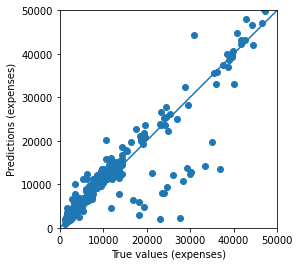

In [10]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_label, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)